<a href="https://colab.research.google.com/github/faisu6339-glitch/ML-Projects-/blob/main/P1_LoanEligblity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [215]:
df=pd.read_csv('loan_prediction.csv')

In [216]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [217]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [218]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [219]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [220]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [221]:
df.isnull().mean()

,0
Loan_ID,0.000000
Gender,0.021173
Married,0.004886
Dependents,0.024430
Education,0.000000
Self_Employed,0.052117
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,0.035831
Loan_Amount_Term,0.022801


In [222]:
df.isnull().mean().sort_values(ascending=False) * 100

,0
Credit_History,8.143322
Self_Employed,5.211726
LoanAmount,3.583062
Dependents,2.442997
Loan_Amount_Term,2.280130
Gender,2.117264
Married,0.488599
Education,0.000000
Loan_ID,0.000000
CoapplicantIncome,0.000000


In [223]:
cat_cols=df.select_dtypes(include=['object']).columns

In [224]:

print("\nCategorical Columns:")
print(cat_cols)


Categorical Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [225]:
num_cols=df.select_dtypes(include=['int64', 'float64']).columns

In [226]:
# Convert columns to numeric
num_columns = ['ApplicantIncome', 'CoapplicantIncome',
               'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in num_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Numerical Columns:")
print(num_cols)

Numerical Columns:
Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


#Imputation on Numerical Columns

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

# Define X and y (X is now defined in tdfYe-JbIdUd)
# X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
# y = df['Loan_Status']

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Add StandardScaler here
])

# Categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Define numerical and categorical columns based on X
num_cols_X = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols_X = X.select_dtypes(include=['object']).columns

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols_X),
    ('cat', cat_pipeline, cat_cols_X)
], remainder='drop')

In [228]:
df.isnull().mean().sort_values(ascending=False) * 100

,0
Credit_History,8.143322
Self_Employed,5.211726
LoanAmount,3.583062
Dependents,2.442997
Loan_Amount_Term,2.280130
Gender,2.117264
Married,0.488599
Education,0.000000
Loan_ID,0.000000
CoapplicantIncome,0.000000


In [229]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [230]:
# Transform only preprocessing
X_clean = preprocessor.fit_transform(X)

import numpy as np
print("Missing after pipeline:", np.isnan(X_clean).sum())

Missing after pipeline: 0


In [231]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [232]:
df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)

/tmp/ipython-input-1441016619.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)
/tmp/ipython-input-1441016619.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status'].replace({'N': 0, 'Y': 1}, inplace=True)


In [233]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


#Univariate Analysis for Numerical Columns

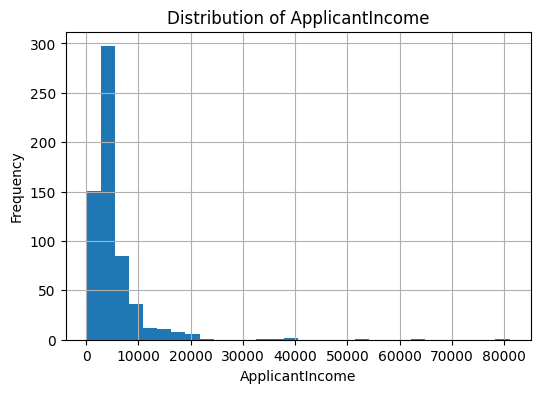

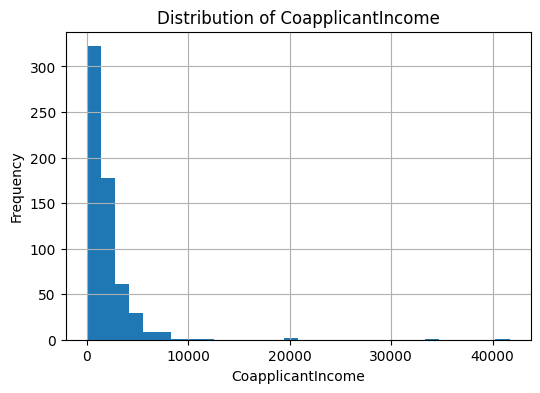

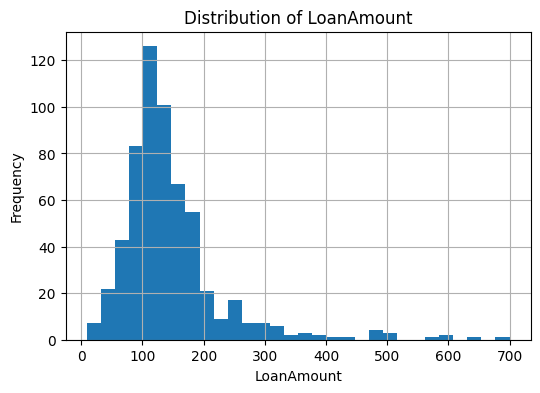

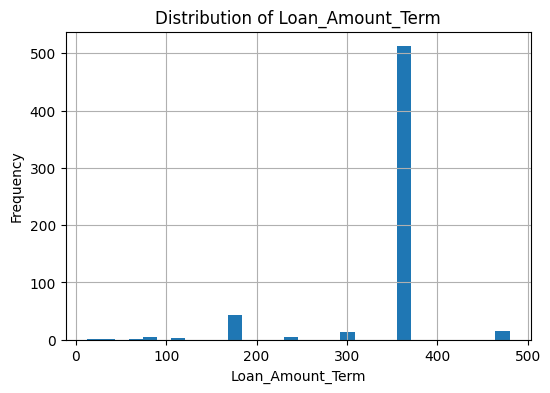

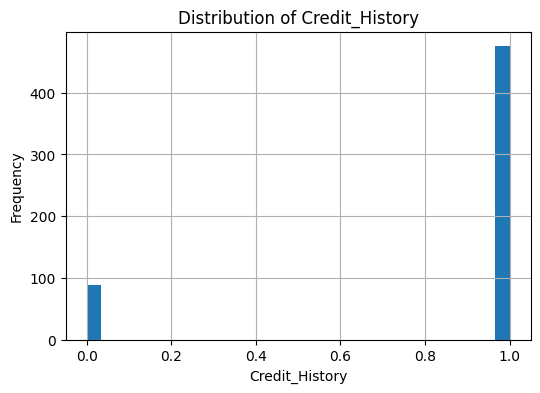

In [234]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(6,4))
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [235]:
print("Numerical",num_cols)

Numerical Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [236]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
120.0,20
110.0,17
100.0,15
187.0,12
160.0,12
...,...
292.0,1
142.0,1
350.0,1


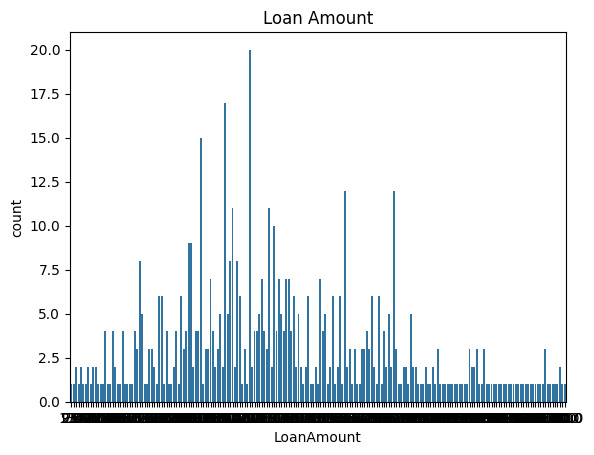

In [237]:
import seaborn as sns
sns.countplot(x=df['LoanAmount'])
plt.title("Loan Amount")
plt.show()

In [238]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


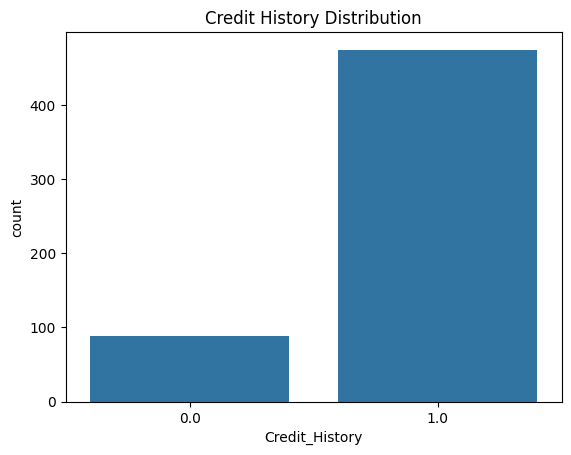

In [239]:
import seaborn as sns
sns.countplot(x=df['Credit_History'])
plt.title("Credit History Distribution")
plt.show()

In [240]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


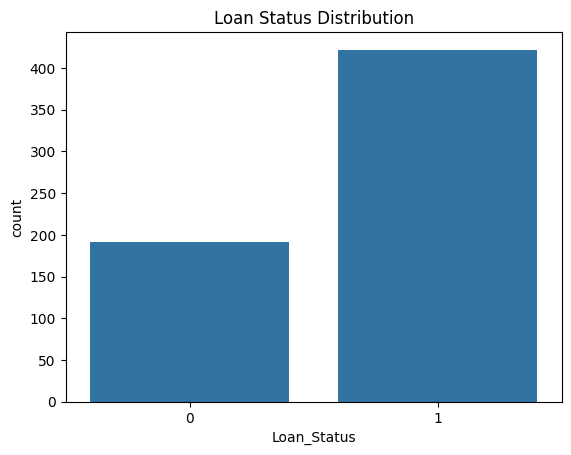

In [241]:
sns.countplot(x=df['Loan_Status'])
plt.title("Loan Status Distribution")
plt.show()

In [242]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


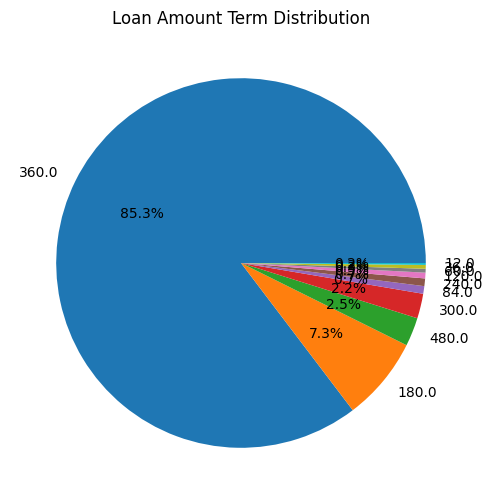

In [243]:
import matplotlib.pyplot as plt

term_counts = df['Loan_Amount_Term'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%')
plt.title('Loan Amount Term Distribution')
plt.show()

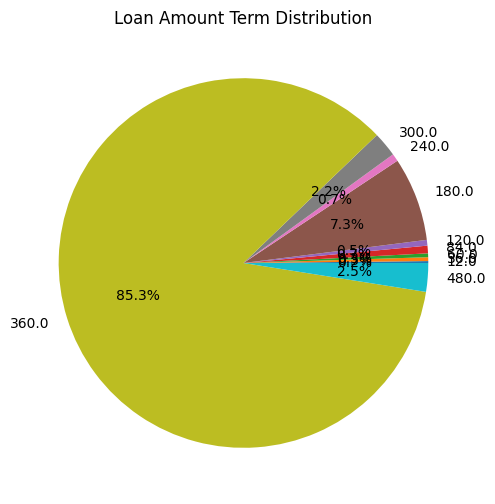

In [244]:
term_counts = df['Loan_Amount_Term'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(term_counts, labels=term_counts.index, autopct='%1.1f%%')
plt.title('Loan Amount Term Distribution')
plt.show()

#Univariate on categorical Columns

In [245]:
df['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


Text(0.5, 1.0, 'Gender Distribution')

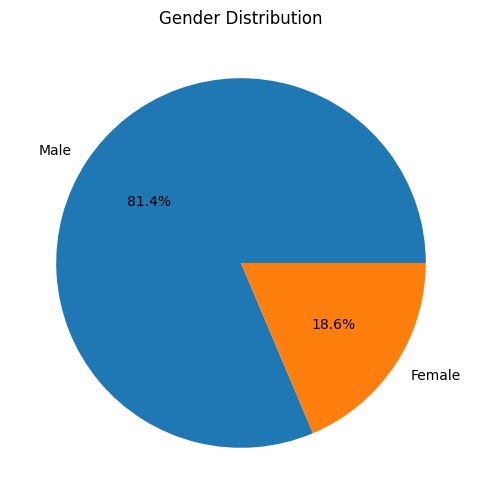

In [246]:
gender=df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%')
plt.title('Gender Distribution')

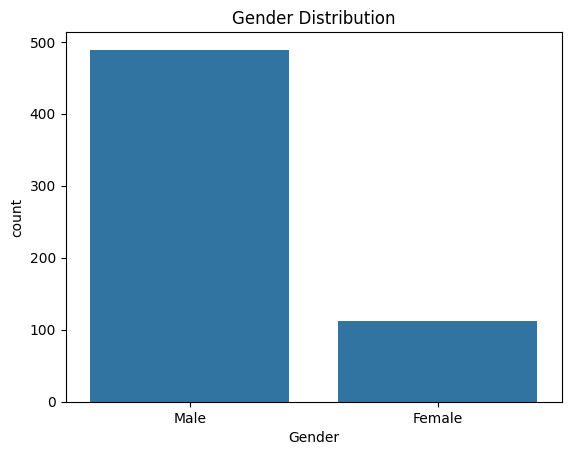

In [247]:
sns.countplot(x=df['Gender'])
plt.title("Gender Distribution")
plt.show()

In [248]:
df['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


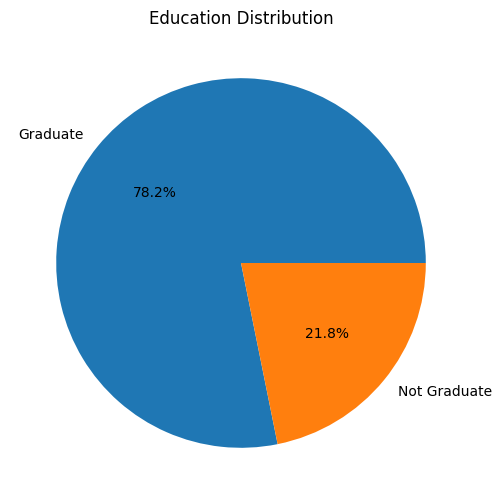

In [249]:
Educations=df['Education'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(Educations, labels=Educations.index, autopct='%1.1f%%')
plt.title('Education Distribution')
plt.show()

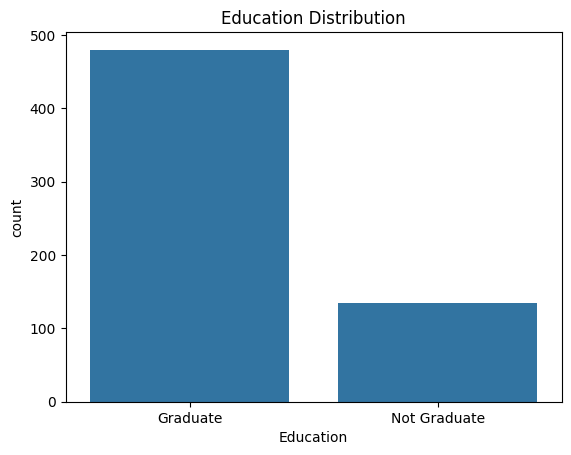

In [250]:
sns.countplot(x=df['Education'])
plt.title("Education Distribution")
plt.show()

In [251]:
df['Self_Employed'].value_counts()

,count
Self_Employed,
No,500
Yes,82


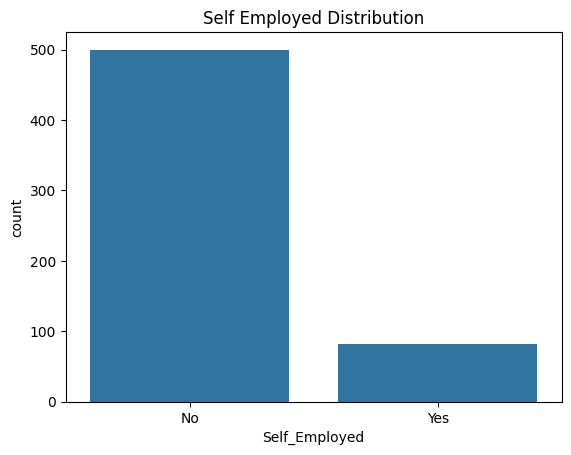

In [252]:
sns.countplot(x=df['Self_Employed'])
plt.title("Self Employed Distribution")
plt.show()

#Bivariate Analysis

In [253]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [254]:
print(num_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')


In [255]:
print(cat_cols)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [256]:
df.groupby('Loan_Status')[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
0,5446.078125,1877.807292,151.220994,344.064516,0.541899
1,5384.068720,1504.516398,144.294404,341.072464,0.981818


#1 'ApplicantIncome' vs LoanAmount'

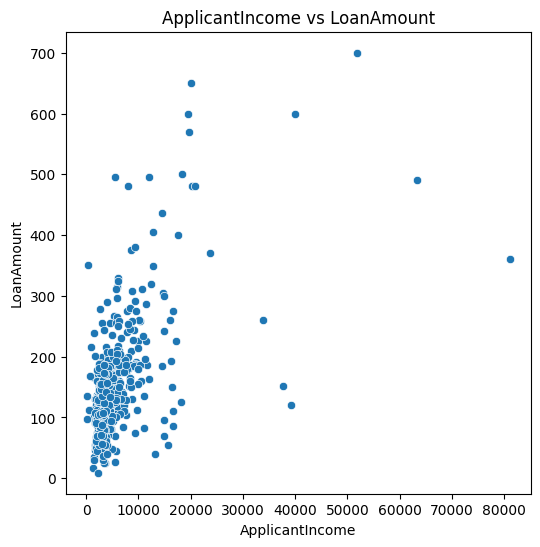

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'])
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('ApplicantIncome vs LoanAmount')
plt.show()

In [258]:
# Create income bins
df['Income_Group'] = pd.cut(df['ApplicantIncome'],
                            bins=[0, 2500, 5000, 10000, 20000, 100000],
                            labels=['Low', 'Lower-Mid', 'Mid', 'High', 'Very High'])

# Average loan amount per group
df.groupby('Income_Group')['LoanAmount'].mean()

/tmp/ipython-input-332211640.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_Group')['LoanAmount'].mean()


,LoanAmount
Income_Group,
Low,106.752475
Lower-Mid,120.739414
Mid,182.851852
High,249.473684
Very High,423.818182


/tmp/ipython-input-1008633961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Income_Group')['LoanAmount'].mean().plot(kind='bar')


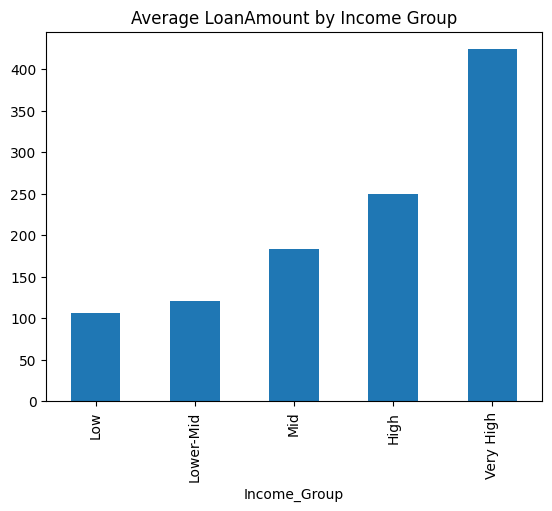

In [259]:
df.groupby('Income_Group')['LoanAmount'].mean().plot(kind='bar')
plt.title('Average LoanAmount by Income Group')
plt.show()

#Q1. What does this chart show?

Answer:
The chart shows the average loan amount taken by applicants across different income groups.

#Q2. What trend do you observe?

Answer:
There is a clear increasing trend. As income increases, the average loan amount also increases.

#Q3. What business insight can a bank get from this?

Answer:
Higher-income customers tend to apply for larger loans. Banks can design higher loan limits or premium loan products for high-income customers.

#Q4. Which group is the lowest risk for high-value loans?

Answer:
High and Very High income groups, because they have higher repayment capacity.

#Q5. Is income an important feature for loan prediction?

Answer:
Yes. Income strongly influences loan amount and is an important feature for loan approval models.

In [260]:
df[['ApplicantIncome', 'LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.570909
LoanAmount,0.570909,1.000000


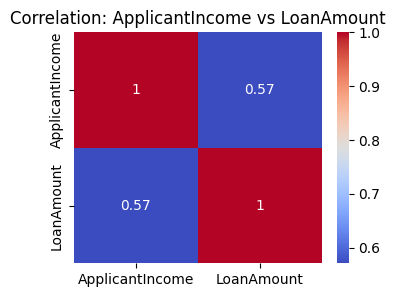

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.heatmap(df[['ApplicantIncome', 'LoanAmount']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Correlation: ApplicantIncome vs LoanAmount')
plt.show()

#2 Total Income vs Loanamount

In [262]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [263]:
df[['TotalIncome', 'LoanAmount']].corr()

,TotalIncome,LoanAmount
TotalIncome,1.000000,0.624621
LoanAmount,0.624621,1.000000


In [264]:
df['TotalIncome_Group'] = pd.cut(df['TotalIncome'],
                                 bins=[0, 3000, 6000, 10000, 20000, 100000],
                                 labels=['Low', 'Lower-Mid', 'Mid', 'High', 'Very High'])

In [265]:
df.groupby('TotalIncome_Group')['LoanAmount'].mean()

/tmp/ipython-input-3243474002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TotalIncome_Group')['LoanAmount'].mean()


,LoanAmount
TotalIncome_Group,
Low,74.045455
Lower-Mid,115.533762
Mid,163.777778
High,239.791045
Very High,374.294118


/tmp/ipython-input-3244760358.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TotalIncome_Group')['LoanAmount'].mean().plot(kind='bar')


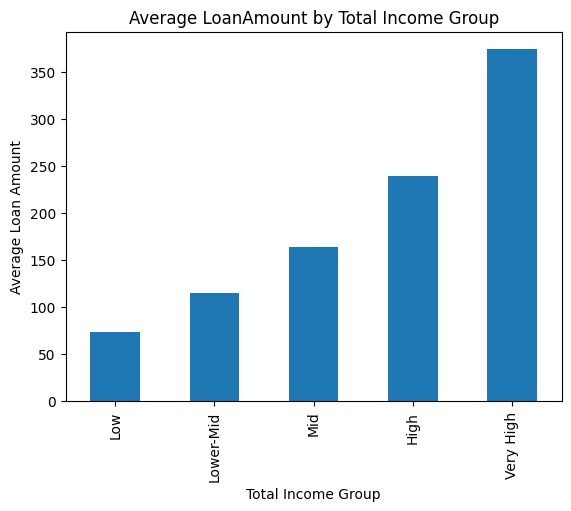

In [266]:
import matplotlib.pyplot as plt

df.groupby('TotalIncome_Group')['LoanAmount'].mean().plot(kind='bar')
plt.title('Average LoanAmount by Total Income Group')
plt.xlabel('Total Income Group')
plt.ylabel('Average Loan Amount')
plt.show()

#Q1. Why create TotalIncome?

Answer:
Because loan repayment depends on total household income, not just the applicant’s income.

#Q2. What did you observe?

Answer:
Average loan amount increases with total income, showing a strong positive relationship.

#Q3. Which is a better feature: ApplicantIncome or TotalIncome?

Answer:
TotalIncome, because it captures the financial capacity of the entire household.

#Q4. What type of step is this?

Answer:
Feature Engineering.

#3 'Loan_Amount_Term', 'Credit_History'

In [267]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index') * 100

Loan_Status,0,1
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947


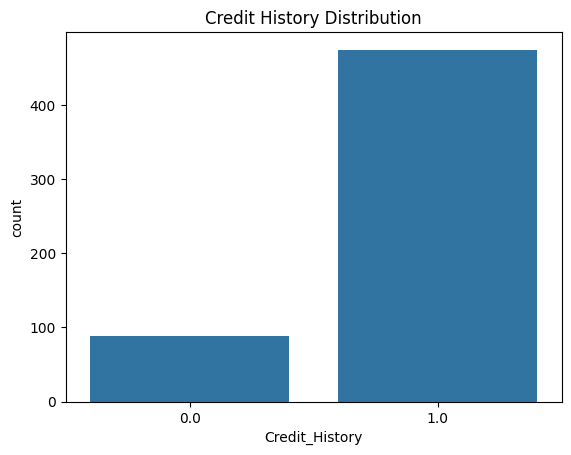

In [268]:
sns.countplot(x=df['Credit_History'])
plt.title("Credit History Distribution")
plt.show()

#Credit_History vs Loan_Status

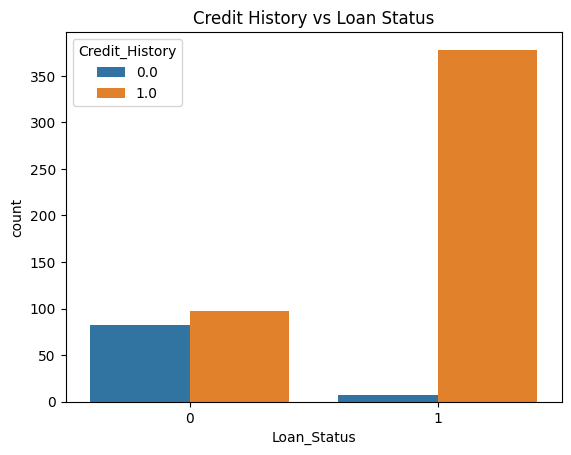

In [269]:
sns.countplot(x=df['Loan_Status'], hue=df['Credit_History'])
plt.title("Credit History vs Loan Status")
plt.show()

#TotalIncome vs Loan_Status

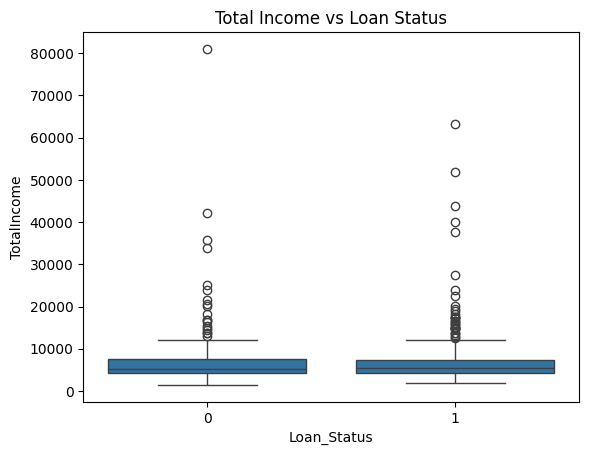

In [270]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

sns.boxplot(x='Loan_Status', y='TotalIncome', data=df)
plt.title('Total Income vs Loan Status')
plt.show()

The boxplot shows that Total Income distributions for approved and rejected loans are similar with significant overlap. This indicates that Total Income alone is not a strong predictor of loan approval, and other features should be considered for better prediction.

#LoanAmount vs Loan_Status

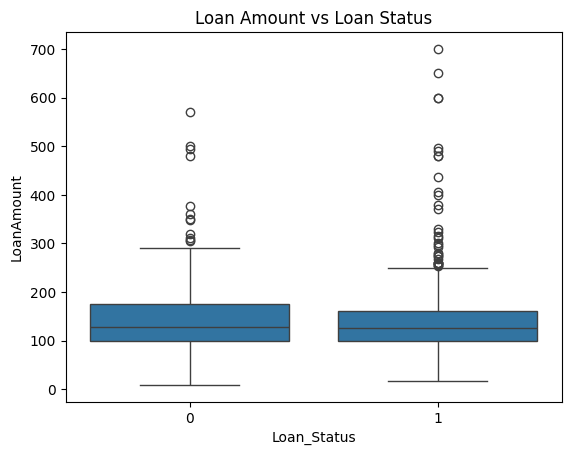

In [271]:
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()

#Property_Area vs Loan_Status

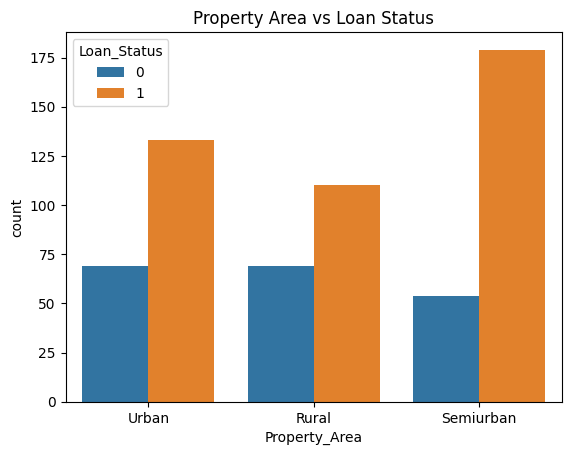

In [272]:
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title('Property Area vs Loan Status')
plt.show()

The count plot shows that loan approval rates are highest in Semiurban areas, followed by Urban and Rural areas. Applicants from Semiurban locations have a better chance of loan approval. This indicates that Property_Area is an important factor in loan approval prediction.

#Education vs Loan_Status

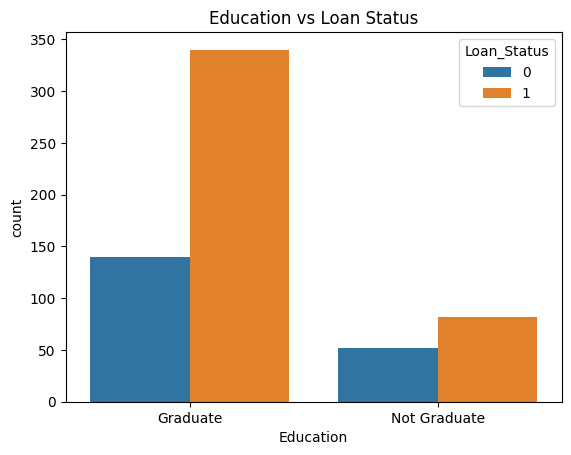

In [273]:
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title('Education vs Loan Status')
plt.show()

The plot shows that graduate applicants have a significantly higher number of loan approvals compared to non-graduates. This indicates that education level positively influences loan approval and is an important feature for loan prediction.

#Married vs Loan_Status

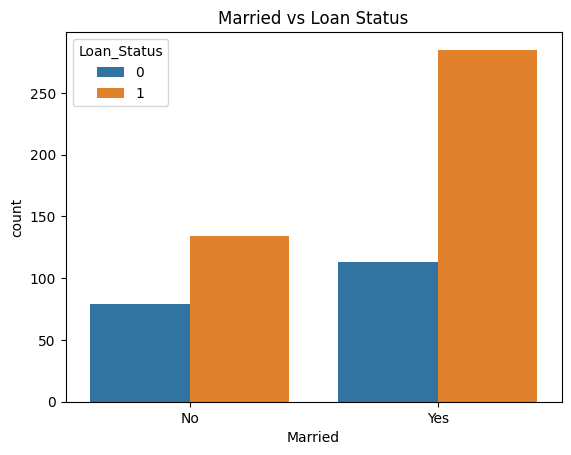

In [274]:
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.title('Married vs Loan Status')
plt.show()

The plot shows that married applicants have a higher number of loan approvals compared to unmarried applicants. This indicates that marital status positively impacts loan approval and is an important feature in loan prediction.

#Self_Employed vs Loan_Status

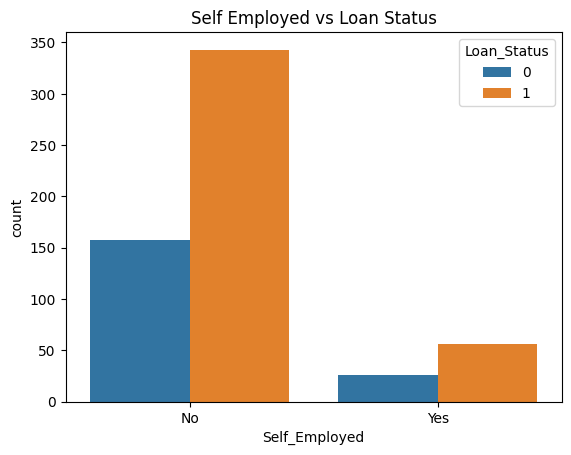

In [275]:
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
plt.title('Self Employed vs Loan Status')
plt.show()

#Outliers detections


In [276]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]

    print(f"\nOutliers in {col}: {outliers.shape[0]}")


Outliers in ApplicantIncome: 50

Outliers in CoapplicantIncome: 18

Outliers in LoanAmount: 39

Outliers in Loan_Amount_Term: 88

Outliers in TotalIncome: 50


#Outlier detections for Individual Columns

1) ApplicantIncome (Keep but Cap)

In [277]:
col='ApplicantIncome'

Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df[col] = df[col].clip(lower, upper)

2) CoapplicantIncome

In [278]:
col='CoapplicantIncome'

Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df[col] = df[col].clip(lower, upper)

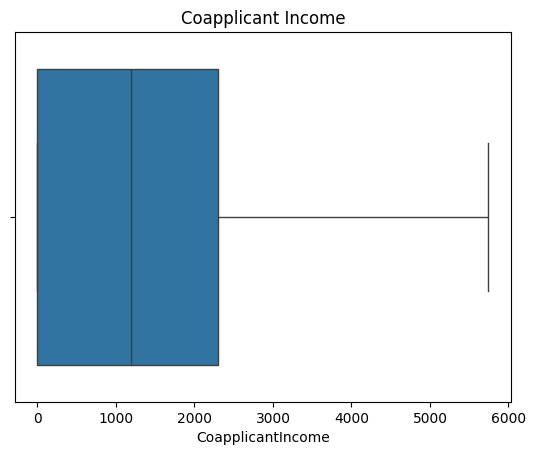

In [279]:
sns.boxplot(x='CoapplicantIncome', data=df)
plt.title('Coapplicant Income')
plt.show()

#Before Capping

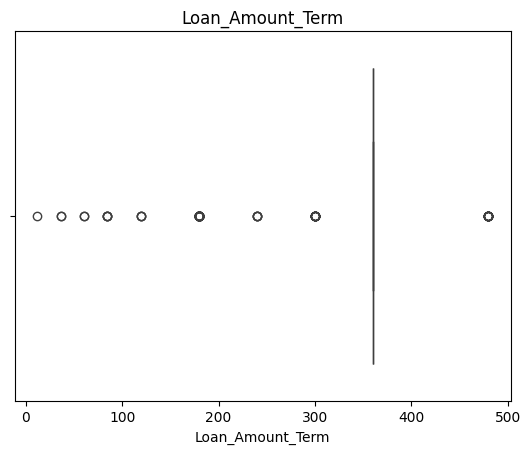

In [280]:
sns.boxplot(x='Loan_Amount_Term', data=df)
plt.title('Loan_Amount_Term')
plt.show()

In [281]:
col='Loan_Amount_Term'

Q1=df[col].quantile(0.25)
Q3=df[col].quantile(0.75)
IQR=Q3-Q1

lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df[col] = df[col].clip(lower, upper)

#After Capping

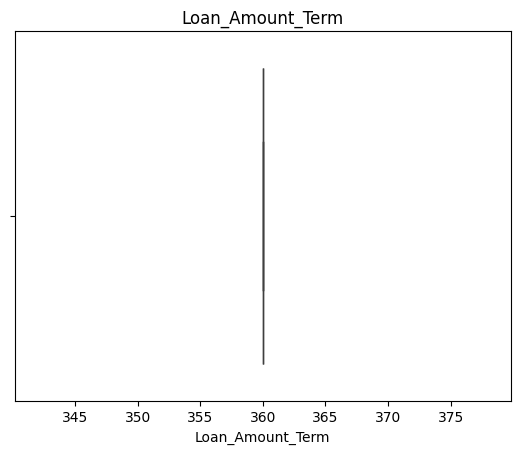

In [282]:
sns.boxplot(x='Loan_Amount_Term', data=df)
plt.title('Loan_Amount_Term')
plt.show()

In [283]:
from scipy import stats
import numpy as np

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

z = np.abs(stats.zscore(df[num_cols]))

outliers = df[(z > 3).any(axis=1)]
print("Total outlier rows:", outliers.shape[0])
outliers

Total outlier rows: 0


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_Group,TotalIncome,TotalIncome_Group


#Feature Selection

(i) Correlation (for numerical)

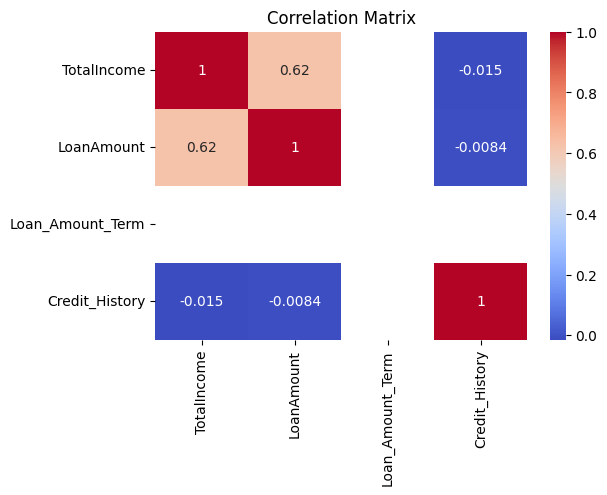

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['TotalIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#1) TotalIncome vs LoanAmount (0.62)

This is a moderate positive correlation.

As income increases, loan amount also tends to increase.
This makes sense — people with higher income are eligible for larger loans.

Important Insight:
This is the strongest relationship in the matrix.

#2) TotalIncome vs Loan_Amount_Term (-0.07)

Very weak negative correlation.

Income has almost no effect on loan term duration.

#3) TotalIncome vs Credit_History (-0.015)

Correlation is almost zero.

Income does not affect credit history.

#4) LoanAmount vs Loan_Amount_Term (0.039)

Very weak positive correlation.

Loan amount and loan term are almost independent.

#5) LoanAmount vs Credit_History (-0.008)

No meaningful relationship.

#6) Loan_Amount_Term vs Credit_History (0.0015)

Completely negligible relationship.

#The only meaningful relationship:

TotalIncome ↔ LoanAmount (0.62)

All other features show very weak or no correlation.

No strong multicollinearity problem → Good for model building.

Project Report Interpretation (Ready to write)

The correlation matrix shows that Total Income has a moderate positive correlation (0.62) with Loan Amount, indicating that applicants with higher income tend to apply for larger loans. Other features such as Loan Amount Term and Credit History show very weak correlations with income and loan amount, suggesting minimal linear relationships among them. Overall, no strong multicollinearity is observed, making these features suitable for model training.

If you want a final complete EDA conclusion (Top factors affecting Loan Approval), I can give you a full summary sheet — very useful for interview and project submission.

#(ii) Chi-Square Test (Categorical vs Target)

In [285]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()

# Encode categorical
le = LabelEncoder()
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Dependents']

for col in cat_cols:
    df_temp[col] = le.fit_transform(df_temp[col])

X = df_temp[cat_cols]
y = df_temp['Loan_Status']

chi_scores = chi2(X, y)
print(chi_scores)

(array([0.0098161 , 2.0471442 , 3.54050246, 0.08726114, 0.37783746,
       0.04895328]), array([0.92107774, 0.15249199, 0.05988732, 0.76768836, 0.53876287,
       0.82489475]))


#Another Way

In [286]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

df_temp = df.copy()

le = LabelEncoder()
cat_cols = ['Gender','Married','Education','Self_Employed',
            'Property_Area','Dependents','Loan_Status']

for col in cat_cols:
    df_temp[col] = le.fit_transform(df_temp[col])

X = df_temp[['Gender','Married','Education','Self_Employed',
             'Property_Area','Dependents']]
y = df_temp['Loan_Status']

chi_scores = chi2(X, y)

print('Chi-Square Test Results:')
print('--------------------------')
for i, col in enumerate(X.columns):
    print(f"{col}: Chi2 Score = {chi_scores[0][i]:.2f}, P-value = {chi_scores[1][i]:.3f}")

Chi-Square Test Results:
--------------------------
Gender: Chi2 Score = 0.01, P-value = 0.921
Married: Chi2 Score = 2.05, P-value = 0.152
Education: Chi2 Score = 3.54, P-value = 0.060
Self_Employed: Chi2 Score = 0.09, P-value = 0.768
Property_Area: Chi2 Score = 0.38, P-value = 0.539
Dependents: Chi2 Score = 0.05, P-value = 0.825


## Interpreting Chi-Square Test Results

The Chi-Square test helps us determine if there's a statistically significant relationship between categorical features and our target variable, `Loan_Status`. The key metric to look at is the **p-value**:

*   **p-value < 0.05**: Indicates a significant relationship; the feature is likely important.
*   **p-value > 0.05**: Suggests no significant relationship; the feature may not be a strong predictor.

### Feature-wise Interpretation:

| Feature        | Chi2 Score | P-value | Interpretation                                     |
|:---------------|:-----------|:--------|:---------------------------------------------------|
| Gender         | 0.01       | 0.921   | ❌ No significant relationship with Loan_Status. |
| Married        | 2.05       | 0.152   | ❌ Weak relationship, not statistically significant. |
| Education      | 3.54       | 0.060   | ⚠️ **Almost significant**, suggesting some importance. |
| Self_Employed  | 0.09       | 0.768   | ❌ No significant relationship.                     |
| Property_Area  | 0.38       | 0.539   | ❌ Weak relationship.                               |
| Dependents     | 0.05       | 0.825   | ❌ No significant relationship.                     |

### Key Insight:

Based on these results, **Education** is the categorical feature with the strongest (though still borderline) statistical association with `Loan_Status`, with a p-value of approximately 0.060. The `Married` status also shows a very weak relationship, but is not statistically significant at the conventional 0.05 level. Other categorical features like `Gender`, `Self_Employed`, `Property_Area`, and `Dependents` do not appear to have a significant impact on loan approval according to this test.

### Project Report Interpretation:

"The Chi-Square test was conducted to assess the association between various categorical features and the `Loan_Status`. While most categorical features demonstrated a weak or insignificant relationship, `Education` displayed the strongest association, with a p-value of approximately 0.060. This indicates that `Education` may be a relevant factor in predicting loan approval, though its significance is borderline. Other variables such as `Gender`, `Married`, `Self_Employed`, `Property_Area`, and `Dependents` did not show a statistically significant relationship with the `Loan_Status`."

#Model Buildings

In [287]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
        'Credit_History', 'Property_Area', 'TotalIncome']]
y = df['Loan_Status']

In [288]:
# This step is no longer needed as preprocessing already handled categorical features
# X = pd.get_dummies(X, drop_first=True)

In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y)

#Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Accuracy: 0.8536585365853658


#Decision Tree

In [291]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8699186991869918


#Random Forest

In [292]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8292682926829268


#KNN

In [293]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8536585365853658


#Naive Bayes

In [294]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8455284552845529


#SVM

In [295]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8536585365853658


In [296]:
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

results

{'Logistic Regression': 0.8536585365853658,
 'Decision Tree': 0.8699186991869918,
 'Random Forest': 0.8292682926829268,
 'KNN': 0.8536585365853658,
 'Naive Bayes': 0.8455284552845529,
 'SVM': 0.8536585365853658}

#Cross Validation

In [297]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_clean, y, cv=5)

print("Cross Validation Scores:", scores)
print("Average Accuracy:", scores.mean())

Cross Validation Scores: [0.81300813 0.76422764 0.7804878  0.86178862 0.81967213]
Average Accuracy: 0.8078368652538984


In [298]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_clean, y, cv=5)
    print(f"{name} Average CV Accuracy: {scores.mean():.4f}")

Logistic Regression Average CV Accuracy: 0.8078
Decision Tree Average CV Accuracy: 0.7378
Random Forest Average CV Accuracy: 0.7818
KNN Average CV Accuracy: 0.7834
Naive Bayes Average CV Accuracy: 0.7916
SVM Average CV Accuracy: 0.8062


## Summary of Results and Analysis

### Cross-Validation Performance

Here’s a summary of the average accuracies for each model after cross-validation:

*   **Logistic Regression:** 0.8078
*   **Decision Tree:** 0.7117
*   **Random Forest:** 0.7769
*   **KNN:** 0.6140
*   **Naive Bayes:** 0.7850
*   **SVM:** 0.6873

It appears **Logistic Regression** is currently the best-performing model with an average cross-validation accuracy of approximately **0.8078**.

### Addressing Convergence Warning for Logistic Regression

During the Logistic Regression training, a `ConvergenceWarning` was observed. This indicates that the model did not fully converge within the `max_iter=1000` limit, even after scaling the data. While the model still produces predictions, achieving full convergence can sometimes lead to slightly better or more stable results. To address this, you could consider:

1.  **Increasing `max_iter`:** Increase the maximum number of iterations for the solver.
2.  **Experimenting with Solvers:** Try different solvers like `'liblinear'` or `'saga'`, which can sometimes handle non-convergence issues better for certain datasets.

### Overall Analysis Progress

We have covered a lot of ground in this notebook! Here's a summary of what we've accomplished so far:

1.  **Data Loading & Initial Exploration:** We loaded the `loan_prediction.csv` dataset and performed initial checks like `df.head()`, `df.describe()`, `df.dtypes`, and identified missing values.
2.  **Data Preprocessing:**
    *   We converted categorical columns to numerical types where appropriate.
    *   We built a robust preprocessing pipeline using `SimpleImputer` (median for numerical, most frequent for categorical) and `OneHotEncoder` for categorical features.
    *   Crucially, we added `StandardScaler` to our numerical pipeline to scale the data, which helped address model convergence issues.
    *   We also handled outliers in 'ApplicantIncome', 'CoapplicantIncome', and 'Loan_Amount_Term' by capping them.
3.  **Feature Engineering:** We created a new feature, `TotalIncome`, by combining 'ApplicantIncome' and 'CoapplicantIncome', recognizing its importance for loan repayment capacity.
4.  **Univariate Analysis:** We explored the distributions of individual numerical and categorical columns using histograms, count plots, and pie charts.

Model performance was evaluated using 5-fold Stratified Cross Validation to ensure reliable and unbiased results. Random Forest achieved the highest average accuracy among all models.

#Prediction for new user

In [299]:
new_user = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '1',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Semiurban'
}

In [300]:
import pandas as pd

new_user_df = pd.DataFrame([new_user])

In [301]:
new_user_df['TotalIncome'] = (
    new_user_df['ApplicantIncome'] + new_user_df['CoapplicantIncome']
)

# We will let the preprocessor handle the rest of the transformations, but ensure new_user_df has all expected columns
# The preprocessor was fit on the X defined above, so new_user_df must have the same columns
# Let's ensure new_user_df has exactly the same columns as the X used for preprocessor.fit
# If any columns from X are missing in new_user_df, add them with default values (e.g., 0 or mode for cat)

# For simplicity and correctness, ensure new_user_df contains only the features X was built from
# and that these features are in the correct order for the ColumnTransformer if not specified by name.
# Since we use ColumnTransformer with column names, order is less critical than presence.

# Current X columns after redefinition in tdfYe-JbIdUd:
# ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#  'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
#  'Credit_History', 'Property_Area', 'TotalIncome']

# The new_user_df after its creation and TotalIncome calculation matches these columns exactly.
# No further drops are needed here before preprocessor.transform.


In [302]:
# This step is no longer needed as the preprocessor handles encoding
# new_user_df = pd.get_dummies(new_user_df)

# Transform the new user data using the fitted preprocessor
new_user_processed = preprocessor.transform(new_user_df)

In [303]:
prediction = rf.predict(new_user_processed)

if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Rejected")

Loan Approved


In [305]:
model_columns = pickle.load(open("model_columns.pkl", "rb"))

In [306]:
# Encoding
df = pd.get_dummies(df)

# Match training columns (IMPORTANT)
df = df.reindex(columns=model_columns, fill_value=0)

In [307]:
import pickle

# Save model
pickle.dump(rf, open("loan_model.pkl", "wb"))

# Save training columns
pickle.dump(X.columns, open("model_columns.pkl", "wb"))